In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv
/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv


In [6]:
#import the library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv')
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [12]:
data.columns
data.describe()

,Unnamed: 0,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.749355,69.624980,68.468327
std,288.747894,15.206049,14.671572,15.307814
min,0.000000,0.000000,10.000000,5.000000
25%,249.000000,56.000000,60.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


In [13]:
data.isnull().sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [14]:
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Gender
female    15424
male      15217
Name: count, dtype: int64


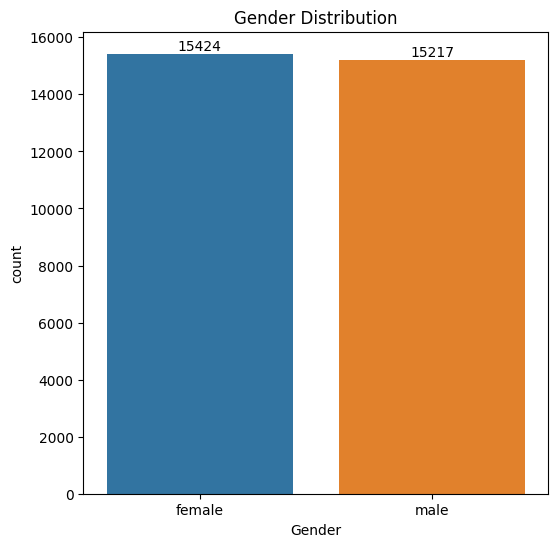

In [27]:
# Gender distribution
print(data.Gender.value_counts())
plt.figure(figsize=(6,6))
ax = sns.countplot(data=data,x="Gender")
#to see count in chart
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

In [22]:
# see the impact ofparent Education on children grade.
group_b = data.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(group_b)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.527787     71.368350     70.374619
bachelor's degree   70.635000     73.375556     73.423611
high school         64.670038     67.522467     65.565909
master's degree     72.168137     75.202044     75.246168
some college        66.603434     69.528093     68.653661
some high school    62.926359     65.826816     63.815473


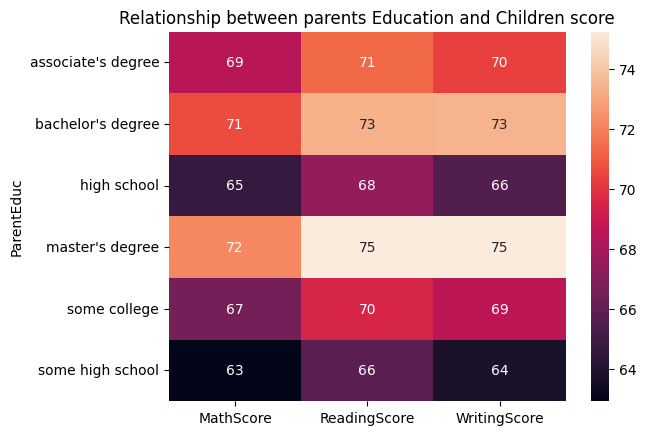

In [24]:
#visualising the above in heatmap
plt.title('Relationship between parents Education and Children score')
sns.heatmap(group_b,annot=True)
plt.show()

In [33]:
# common cultural background group
print(data['EthnicGroup'].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


In [43]:
GroupA = data.loc[(data['EthnicGroup'] == "group A")].count()
GroupB = data.loc[(data['EthnicGroup'] == "group B")].count()
GroupC = data.loc[(data['EthnicGroup'] == "group C")].count()
GroupD = data.loc[(data['EthnicGroup'] == "group D")].count()
GroupE = data.loc[(data['EthnicGroup'] == "group E")].count()

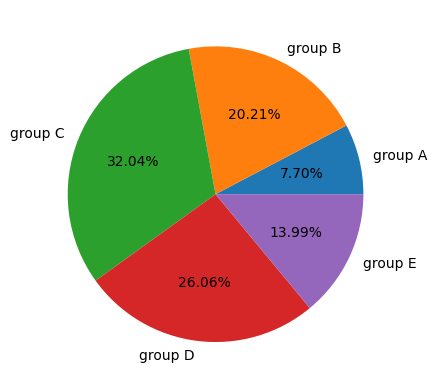

In [47]:
group_list = ["group A","group B","group C","group D","group E"]
mList = [GroupA['EthnicGroup'],GroupB['EthnicGroup'],GroupC['EthnicGroup'],GroupD['EthnicGroup'],GroupE['EthnicGroup']]
plt.pie(mList, labels = group_list,autopct = "%1.2f%%")
plt.show()